# Ajuste de curvas

A regressão linear permite encontrar a melhor reta que se ajusta a um conjunto de pontos fornecidos.

Veremos agora como ajustar o conjunto de pontos no caso de modelo não-lineares.

* Regressão linear múltipla
* Linearização de modelos não-lineares
* Mínimos quadrados para polinômios
* Regressão não-linear

# Linearização de modelos não-lineares

Suponha que o modelo tenha a forma de uma curva exponencial:

\begin{equation}
y = \alpha e^{\beta x}
\end{equation}

onde $\alpha$ e $\beta$ são os parâmetros a serem estimados.

Diversos sistemas apresentam este comportamento, como o crescimento populacional, o decaimento radioativo dentre outros.

Podemos **linearizar** o modelo tomando-se o logaritmo e obtendo:

\begin{equation}
\ln y = \ln \alpha + \beta x
\end{equation}

Observe que este modelo apresenta a equação de uma reta:

\begin{equation}
Y = \theta_0 + \theta_1x
\end{equation}

onde $Y = \ln y$, $\theta_0 = \ln \alpha$ e $\theta_1 = \beta$ e assim podemos utilizar o método dos mínimos quadrados no modelo linearizado.


## Exemplo

Considere um experimento que mediu o decaimento de um material radioativo.
À medida que o tempo passa, ele emite partículas e sua massa diminui.
A emissão, por sua vez, depende da massa e também diminui com o passar do tempo, seguindo uma curva exponencial.
Os dados coletados de massa e tempo encontram-se na tabela abaixo:

| Tempo (x) | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | 
| Massa (y) | 8100 | 6420 | 4960 | 3190 | 2530 | 2070 | 1800 | 1620 | 1380 |

1. Plote o gráfico dos pontos coletados (tempo no eixo $x$ e massa no eixo $y$).
2. Em seguida, plote novamente utilizando o eixo semi-log.
3. Calcule os valores de $\ln y$ e plote o gráfico de $\ln y \times x$
4. Faça a linearização e encontre os parâmetros que melhor se ajustam a curva $y = \alpha e^{\beta x}$.
5. Plote o gráfico da curva obtida pelo método dos mínimos quadrados
6. Estime a massa no tempo $t = 10$

d:\system\conda_envs\cn\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     187.8
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           2.60e-06
Time:                        17:44:15   Log-Likelihood:                 6.8064
No. Observations:                   9   AIC:                            -9.613
Df Residuals:                       7   BIC:                            -9.218
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9036      0.079    112.474      0.0

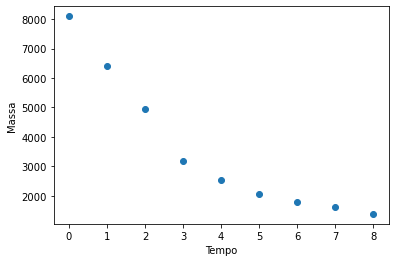

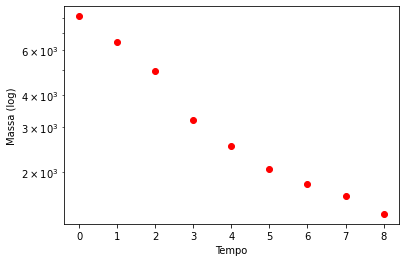

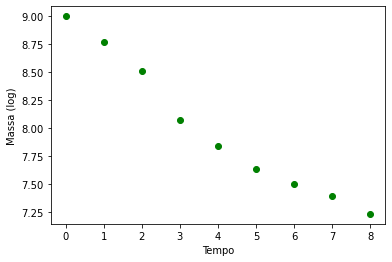

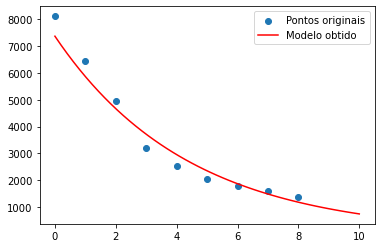

In [79]:
import numpy as np
import matplotlib.pyplot as plt

tempo = [0, 1, 2, 3, 4, 5, 6, 7, 8]
massa = [8100, 6420, 4960, 3190, 2530, 2070, 1800, 1620, 1380]

X = np.array(tempo)
Y = np.array(massa)

# 1. Plote o gráfico dos pontos coletados (tempo no eixo  𝑥  e massa no eixo  𝑦 ).
plt.scatter(X, Y)
plt.xlabel('Tempo')
plt.ylabel('Massa')
plt.figure()

# 2. Em seguida, plote novamente utilizando o eixo semi-log.
plt.semilogy(X, Y, 'or')
plt.xlabel('Tempo')
plt.ylabel('Massa (log)')

# 3. Calcule os valores de  ln(y)  e plote o gráfico de  ln(y) x x
LNY = np.log(Y)
plt.figure()
plt.scatter(X, LNY, c='g')
plt.xlabel('Tempo')
plt.ylabel('Massa (log)')

# 4. Faça a linearização e encontre os parâmetros que melhor se ajustam a curva  y=alpha e^{betax}
import statsmodels.api as sm

data = {'x1' : X, 'y': LNY}
modelo = ols('y ~ x1', data = data)
resultado = modelo.fit()
print(resultado.summary())
print(resultado.params)

# o valor obtido foi de th1 = ln(alpha). Para achar o valor de alpha fazemos:
alpha = np.exp(resultado.params[0])
beta = resultado.params[1]
print(f'A equação obtida foi: y = {alpha:.4f}e^{beta:.4f}x')

# 5. Plote o gráfico da curva obtida pelo método dos mínimos quadrados
Xr = np.linspace(0, 10)
Yr = alpha*np.exp(Xr*beta)
plt.figure()
plt.scatter(X, Y)
plt.plot(Xr, Yr, 'r')
plt.legend(['Pontos originais', 'Modelo obtido'])

# 6. Estime a massa no tempo t = 10
logm = resultado.predict(exog=dict(x1=10))
m10 = np.exp(logm[0])
print(f'A massa estimada é de {m10:.3f}')

## Exemplo 2: Crescimento exponencial

A população brasileira tem crescido constantemente nas últimas décadas, apresentando um alto crescimento vegetativo.
Embora a taxa de natalidade tenha apresentado diminuição nos últimos anos, o aumento da espectativa de vida e a diminuição da taxa de mortalidade tem contribuído com o aumento populacional.

Observe os dados da população brasileira nas últimas décadas:

| Ano | População |
| --- | --- |
| 1872 | 9.930.478 |
| 1890 | 14.333.915 |		
| 1900 | 17.438.434 |		
| 1920 | 30.635.605	|	
| 1940 | 41.236.315	|	
| 1950 | 51.944.397	|	
| 1960 | 70.992.343	|	
| 1970 | 94.508.583	|	
| 1980 | 121.150.573 |		
| 1991 | 146.917.459 |		
| 2000 | 169.590.693 |		
| 2010 | 190.755.799 |

1. Trace o diagrama de dispersão dos dados acima
2. Em seguida, plote novamente utilizando o eixo semi-log.
3. Ajuste os dados a uma curva exponencial
4. Sabendo que a população brasileira em 2020 foi de 212,6 milhões de habitantes, podemos afirmar que o crescimento continua obedecendo uma curva exponencial?

A equação obtida foi: y = 6.183e-12 exp(0.0224x)
A estimativa para a população em 2020 é de 267592629 habitantes


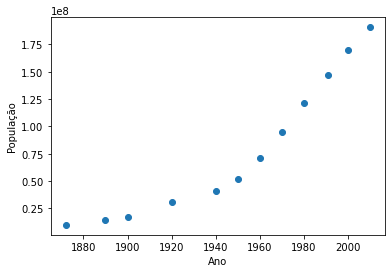

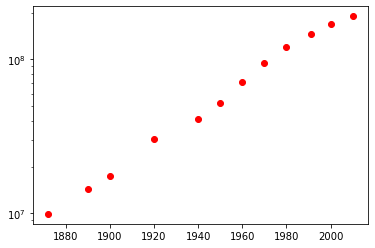

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

data = [{'ano': 1872, 'pop': 9930478}, {'ano': 1890, 'pop': 14333915}, {'ano': 1900, 'pop': 17438434}, 
 {'ano': 1920, 'pop': 30635605}, {'ano': 1940, 'pop': 41236315}, {'ano': 1950, 'pop': 51944397},
 {'ano': 1960, 'pop': 70992343}, {'ano': 1970, 'pop': 94508583}, {'ano': 1980, 'pop': 121150573},
 {'ano': 1991, 'pop': 146917459}, {'ano': 2000, 'pop': 169590693}, {'ano': 2010, 'pop': 190755799}]

df = pd.DataFrame(data) 

X = datadf['ano']
Y = datadf['pop']

# 1. Trace o diagrama de dispersão dos dados acima
plt.scatter(X, Y)
plt.xlabel('Ano')
plt.ylabel('População')

# 2. Em seguida, plote novamente utilizando o eixo semi-log.
plt.figure()
plt.semilogy(X, Y, 'or')

# 3. Ajuste os dados a uma curva exponencial
from scipy import stats

LNY = np.log(Y)
r = stats.linregress(X, LNY)
th1,th0 = r.slope, r.intercept

# o valor obtido foi de th1 = ln(alpha). Para achar o valor de alpha fazemos:
alpha = np.exp(th0)
beta = th1
print(f'A equação obtida foi: y = {alpha:.3e} exp({beta:.4f}x)')
estimativa = alpha*np.exp(2020*beta)
print(f'A estimativa para a população em 2020 é de {estimativa:.0f} habitantes')

# Sabendo que a população brasileira em 2020 foi de 212,6 milhões de habitantes, podemos afirmar que o crescimento continua obedecendo uma curva exponencial?

(array([1.00000000e+00, 7.99528828e+07, 1.00000000e+00]), array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]]))


d:\system\conda_envs\cn\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


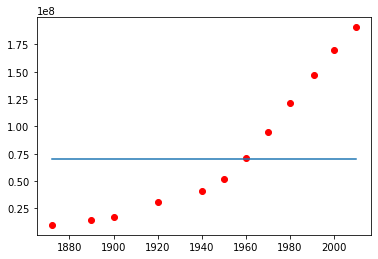

In [159]:
X = np.array(ano)
Y = np.array(populacao)

def crescimentologistico(theta):
    N = Y 
    t = X 
    N0 = theta[0]
    k = theta[1]
    r = theta[2]
    residuo = N - N0*k/((k-N0)*np.exp(-r*t)+N0)
    return N0*k/((k-N0)*np.exp(-r*t)+N0)
    #return np.sum(residuo**2)

def crescimentologistico2(t, N0, k, r):
    return N0*k/((k - N0)*np.exp(-r*t) + N0)
       
x0 = [9930478, 50000000, 0.02]

from scipy.optimize import curve_fit
#import scipy.optimize as opt
#res = opt.minimize(crescimentologistico, x0)

res = curve_fit(crescimentologistico2, X, Y)
print(res)

YY = crescimentologistico2(X, 90000, 70000000, 0.05)
plt.plot(X, YY)
plt.scatter(X, Y, c='r')

# Regressão linear múltipla

A regressão linear múltipla é semelhante à regressão linear simples, porém com mais de uma variável independente, significando que a variável a ser predita é baseada em 2 ou mais variáveis de entrada.

Matematicamente temos:

\begin{equation}
y = \beta_0 + \beta_1x_1 + \beta_2x_2
\end{equation}

onde $y$ é a variável dependente, $\beta_0$, a constante, $\beta_1$ a inclinação em relação à variável $x_1$ e $\theta_2$ a inclinação em relação à variável $x_2$.

Para que a regressão linear múltipla traga bons resultados é preciso que:

1. Existe uma relação linear entre a variável dependente e as variáveis independentes.
2. As variáveis independentes não tenham alta correlaçãno entre si.
3. O tamanho do residuo não depende do tamanho do valor de entrada (homocedasticidade)
4. Os resíduos apresentam distribuição normal

Avalie a utilização de um modelo de regressão linear múltipla na tentativa de explicar a variação da viscosidade (y) de um polímero em função da temperatura (x1) de reação e da taxa de adição (x2) do catalisador.
Através da realização de experimentos para diferentes valores de x1 e x2, obtiveram-se os valores de y mostrados na tabela abaixo. 

https://uenf.br/posgraduacao/matematica/wp-content/uploads/sites/14/2017/09/28052015Renato-Neves-de-Almeida.pdf

1. Encontre o ajuste desejado pelo Método dos Mínimos Quadrados 
2. Calcule e utilize o coeficiente de determinação ajustado (r2 ajust.) para fazer uma avaliação do modelo.

| Observação | Viscosidade (y Pa s) | Temperatura(x1 - ºC) | Catalisador(x2 - lb/h) |
| --- | --- | --- | --- |
| 1 | 2256 | 80 | 8 |
| 2 | 2340 | 93 | 9 |
| 3 | 2426 | 100 | 10 |
| 4 | 2293 | 82 | 12 |
| 5 | 2330 | 90 | 11 |
| 6 | 2368 | 99 | 8 |
| 7 | 2250 | 81 | 8 |
| 8 | 2409 | 96 | 10 |
| 9 | 2364 | 94 | 12 |
| 10 | 2379 | 93 | 11 |
| 11 | 2440 | 97 | 13 |
| 12 | 2364 | 95 | 11 |
| 13 | 2404 | 100 | 8 |
| 14 | 2317 | 85 | 12 |
| 15 | 2309 | 86 | 9 |
| 16 | 2328 | 87 | 12 |

In [171]:
import pandas as pd
import statsmodels.api as sm

dados = pd.DataFrame([{'obs': 1, 'visc': 2256, 'temp': 80, 'catal': 8},
         {'obs': 2, 'visc': 2340, 'temp': 93, 'catal': 9},
         {'obs': 3, 'visc': 2426, 'temp': 100, 'catal': 10},
         {'obs': 4, 'visc': 2293, 'temp': 82, 'catal': 12},
         {'obs': 5, 'visc': 2330, 'temp': 90, 'catal': 11},
         {'obs': 6, 'visc': 2368, 'temp': 99, 'catal': 8},
         {'obs': 7, 'visc': 2250, 'temp': 81, 'catal': 8},
         {'obs': 8, 'visc': 2409, 'temp': 96, 'catal': 10},
         {'obs': 9, 'visc': 2364, 'temp': 94, 'catal': 12},
         {'obs': 10, 'visc': 2379, 'temp': 93, 'catal': 11},
         {'obs': 11, 'visc': 2440, 'temp': 97, 'catal': 13},
         {'obs': 12, 'visc': 2364, 'temp': 95, 'catal': 11},
         {'obs': 13, 'visc': 2404, 'temp': 100, 'catal': 8},
         {'obs': 14, 'visc': 2317, 'temp': 85, 'catal': 12},
         {'obs': 15, 'visc': 2309, 'temp': 86, 'catal': 9},
         {'obs': 16, 'visc': 2328, 'temp': 87, 'catal': 12}])

X = dados[['temp', 'catal']]
Y = dados['visc']
X = sm.add_constant(X)
modelo = sm.OLS(Y, X).fit()
modelo.summary()

d:\system\conda_envs\cn\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   visc   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     82.50
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           4.10e-08
Time:                        12:09:53   Log-Likelihood:                -65.758
No. Observations:                  16   AIC:                             137.5
Df Residuals:                      13   BIC:                             139.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1566.0778     61.592     25.427      0.000    1433.017    1699.139
temp           7.6213      0.618     12.324      0.000       6.285       8.957
catal          8.5848      2.439      3.520      0.004       3.316      13.853
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   2.607
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.779
Skew:                          -0.004   Prob(JB):                        0.677
Kurtosis:                       1.919   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""